In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_avocado=pd.read_csv('avocado.csv')

In [30]:
#1. Display basic information about the DataFrame and 
# its columns to see that the Date column has the object type.
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [31]:
#2. Convert the Date column to the datetime type
# Convert the Date column to datetime
df_avocado['Date'] = pd.to_datetime(df_avocado['Date'])

In [32]:
#3. Filter the data so it contains just the rows for 2015, for the conventional type, and for 
#the region named Albany. Store just the Date, Total Bags, and Small Bags columns in new DataFrame.
# Filter the DataFrame
df_2015_albany = df_avocado[
    (df_avocado['Date'].dt.year == 2015) &
    (df_avocado['type'] == 'conventional') &
    (df_avocado['region'] == 'Albany')
][['Date', 'Total Bags', 'Small Bags']]

# Display first few rows
df_2015_albany.head()

,Date,Total Bags,Small Bags
0,2015-12-27,8696.87,8603.62
1,2015-12-20,9505.56,9408.07
2,2015-12-13,8145.35,8042.21
3,2015-12-06,5811.16,5677.40
4,2015-11-29,6183.95,5986.26


In [33]:
#4. Melt the data in the Total Bags and Small Bags columns, but not the values in the Date column.
# Name the column that contains the type of bag Bags, 
# and name the column that contains the number of bags Count. 
# Then, display the resulting DataFrame.Melt the DataFrame
melted = df_2015_albany.melt(id_vars='Date',
    value_vars=['Total Bags', 'Small Bags'],
    var_name='Bags',
    value_name='Count'
)

# Display the melted DataFrame
melted.head()

,Date,Bags,Count
0,2015-12-27,Total Bags,8696.87
1,2015-12-20,Total Bags,9505.56
2,2015-12-13,Total Bags,8145.35
3,2015-12-06,Total Bags,5811.16
4,2015-11-29,Total Bags,6183.95


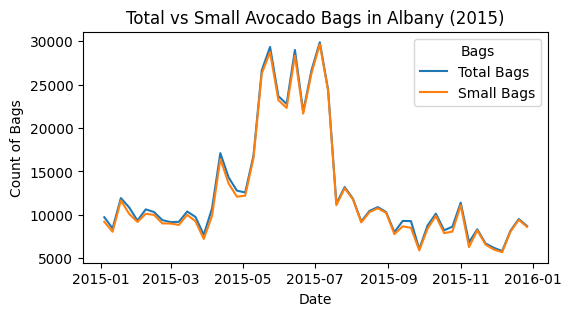

In [34]:
#5. Plot the melted data with Seaborn in a line plot,
# using the hue parameter to distinguish between the bag types. 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
sns.lineplot(data=melted, x='Date', y='Count', hue='Bags')
plt.title('Total vs Small Avocado Bags in Albany (2015)')
plt.xlabel('Date')
plt.ylabel('Count of Bags')
plt.show()

In [35]:
#6.Bin the data in the Total Volume column into four quantiles labeled ‘poor’, ‘modest’, ‘good’
# , and ‘excellent’, and store the bin labels in a new column. 

df_avocado['Volume_Category'] = pd.qcut(df_avocado['Total Volume'], 
            q=4,labels=['poor', 'modest', 'good', 'excellent'])

# Display sample rows
df_avocado[['Total Volume', 'Volume_Category']].head()

,Total Volume,Volume_Category
0,64236.62,modest
1,54876.98,modest
2,118220.22,good
3,78992.15,modest
4,51039.60,modest


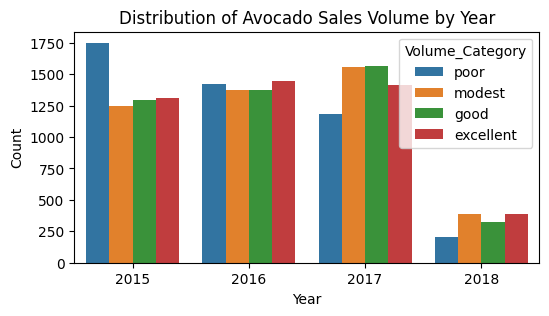

In [36]:
#7. Plot the binned data by year using a Seaborn count plot. 
# Extract the year from the Date column
df_avocado['Year'] = df_avocado['Date'].dt.year

plt.figure(figsize=(6,3))
sns.countplot(data=df_avocado, x='Year', hue='Volume_Category')
plt.title('Distribution of Avocado Sales Volume by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

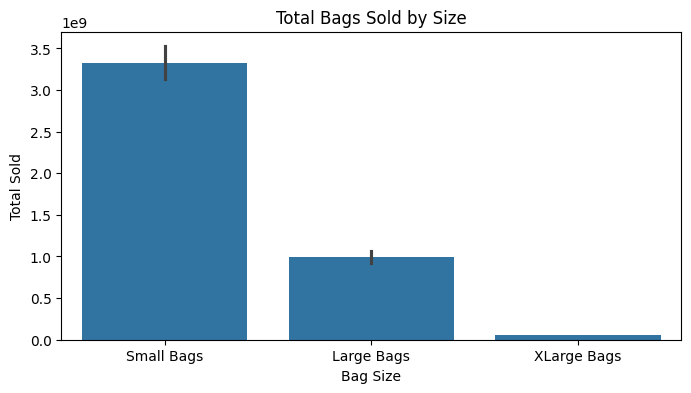

In [37]:
#8. Which of the three bag sizes sells the most? Hint:
# Melt the three bag size columns and plot the bags by year.
bag_melt = df_avocado.melt(
    id_vars=['Date'],
    value_vars=['Small Bags', 'Large Bags', 'XLarge Bags'],
    var_name='Bag_Size',
    value_name='Count'
)
# Plot total bag counts by size
plt.figure(figsize=(8,4))
sns.barplot(data=bag_melt, x='Bag_Size', y='Count', estimator=sum)
plt.title('Total Bags Sold by Size')
plt.xlabel('Bag Size')
plt.ylabel('Total Sold')
plt.show()

In [38]:
#9. Which type of avocado sells the most? Answer with code. 
# Group by type and sum the total volume
type_sales = df_avocado.groupby('type')['Total Volume'].sum().reset_index()\
.sort_values(by='Total Volume', ascending=False)

type_sales.head()


,type,Total Volume
0,conventional,1.508722e+10
1,organic,4.361817e+08
